## Notebook Purpose

create, view different versions of poisson disc mask

In [1]:
import os, sys
import numpy as np
import torch
import matplotlib.pyplot as plt
import sigpy
from sigpy.mri.samp import poisson

In [2]:
# create mask
ACCEL = 12
mask = poisson(img_shape=(512, 160), accel=ACCEL)
mask = torch.from_numpy(mask)
mask = abs(mask).type(torch.uint8)

# force central CxC region to be 1's
idx_y, idx_z = mask.shape[0] // 2, mask.shape[1] // 2
C=32
mask[idx_y-C:idx_y+C, idx_z-C:idx_z+C] = 1

assert mask.shape == torch.Size([512,160])
accel_adj = float(1. / (torch.count_nonzero(mask) / (512*160)))

print('given accel {}, factor adjusted to {} after forcing CxC 1s'.format(
        ACCEL, np.round(accel_adj,4)))

mask.shape

given accel 12, factor adjusted to 8.0251 after forcing CxC 1s


torch.Size([512, 160])

In [3]:
# np.save('mask_poisson_disc_4x.npy', mask)

# mask = np.load('mask_poisson_disc_4x.npy')

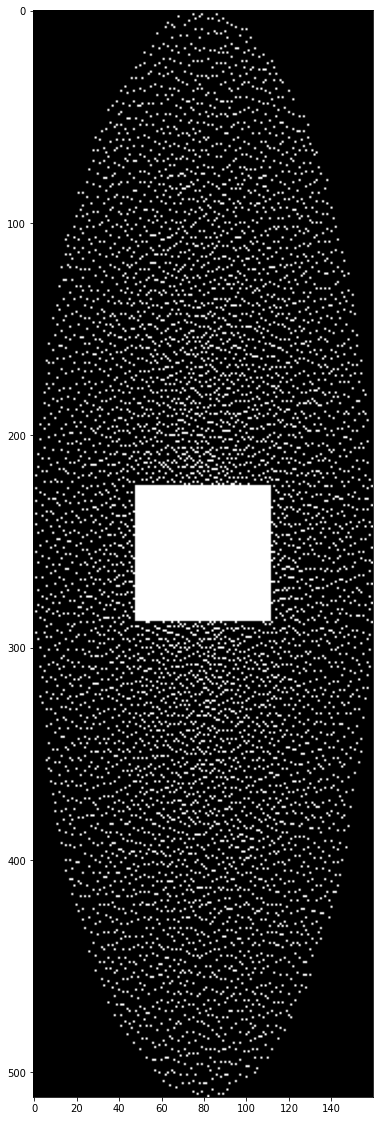

In [4]:
plt.figure(figsize=(20,20))
plt.imshow(mask, cmap='gray')
plt.show()